# Polytech SI3 - Données numériques
Diane Lingrand

Diane.Lingrand@univ-cotedazur.fr

2022-2023

# Cours 3 - kNN

In [1]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import pickle

## kNN in dimension 2

### simple synthetic data for debuging

We will start with few data (2d points) arranged in a regular grid and two classes: 0 and 1.

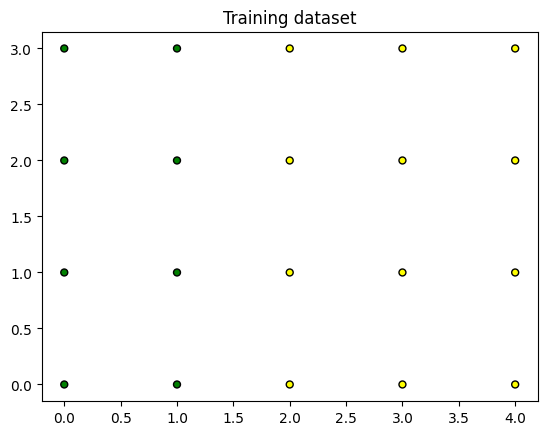

In [2]:
nbClasses = 2
# the 2d points
Xtrain =np.mgrid[0:4.1:1, 0:3.1:1].reshape(2,-1).T
# the classes
yTrain = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]
# the vector of colors for drawing purpose
colors = np.array(["green","yellow", "black"])
# let draw the points using colored circles with black edges
plt.title("Training dataset")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

Set a variable 'kNN' to the number of neighbors you would like to consider (start with 5). A new point will be denoted by 'newX'.

In [3]:
newX = [3.5,0.5]
nKNN = 5

**Question 1:** Compute all Euclidean distances between this new point and all points in the training dataset. You will need [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [numpy.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) functions.

In [4]:
#list of all distances
# your work here
distance_list = np.sqrt(np.sum((Xtrain-newX)*(Xtrain-newX),axis=1))


**Question 2:** Sort the distances and build an array of indices of training points using [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [18]:
# your work here
sorted_arr_indices = np.argsort(distance_list)
print(sorted_arr_indices)

[17 16 13 12  9 14  8 18 10 15 19  5  4 11  6  1  7  0  2  3]


**Question 3:** Take the indices of 'nKNN' smallest distances. Build an array 'Xn' of the training points at these indices and 'yn' for the corresponding classes.

In [20]:
# nKNN smallest distances indices
nei = sorted_arr_indices[:nKNN]

# nKNN closest data
Xn = [Xtrain[nei[i]] for i in range(nKNN)]
yn = [yTrain[nei[i]] for i in range(nKNN)]

**Question 4:** Using 'yn' compute the majority vote. Don't consider ambiguity now. [numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) will be useful.

In [21]:
# majority vote for the class
classes_occ = [0 for i in range(nbClasses)]
for c in yn:
    classes_occ[int(c)]+=1

classe = np.argmax(classes_occ)
# your work here

print("classe = ", classe)

classe =  1


**Question 4bis:** The same but highlight the ambiguity by assigning the classe 'nbClasses' 

In [8]:
classes, counts = np.unique(yn, return_counts=True)
nbOfMaxClasses = np.count_nonzero(
    counts == np.max(counts))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
if nbOfMaxClasses > 1:
    classe = nbClasses
else:
    maxOccIndex = np.argmax(counts)  # renvoie l'indice de l'occurrence la plus élevée
    classe = classes[
        maxOccIndex]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
print("classe = ", classe)

classe =  1


**Question 5:** Plot the training dataset as before. In addition, plot the neighbors point using size 100 instead of 25. Plot the new point using '.' marker, in red. Play with the parameter k and the position of this new point.
    

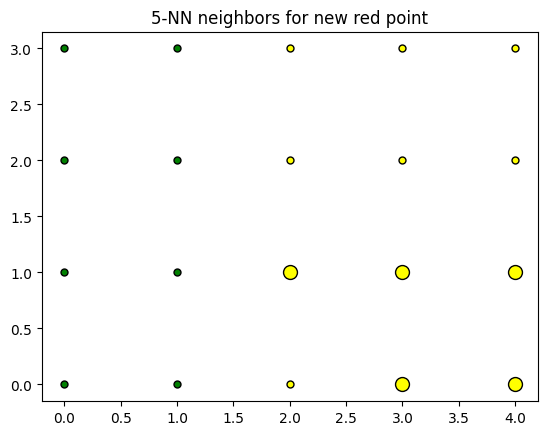

In [9]:
thetitle = str(nKNN)+"-NN neighbors for new red point"
plt.title(thetitle)

# your work here
# the 2d points
for i in range(len(Xtrain)):
    if i in nei:
        plt.scatter(Xtrain[:, 0][i], Xtrain[:, 1][i], marker="o", c=colors[yTrain[i]], s=100, edgecolor="k")
    else:
        plt.scatter(Xtrain[:, 0][i], Xtrain[:, 1][i], marker="o", c=colors[yTrain[i]], s=25, edgecolor="k")

**Question 6:** Put everything in the next function and return the class.

In [10]:
def voteKnn(xtrain, ytrain, nKnn, newData):
    
    # your work here
    distance_list = np.sqrt(np.sum((Xtrain-newData)*(Xtrain-newData),axis=1))
    
    sorted_arr_indices = np.argsort(distance_list)
    
    # nKNN smallest distances indices
    nei = [sorted_arr_indices[i] for i in range(nKnn)]

    # nKNN closest data
    Xn = [xtrain[nei[i]] for i in range(nKnn)]
    yn = [ytrain[nei[i]] for i in range(nKnn)]
    
    # majority vote for the class
    classes_occ = [0 for i in range(nbClasses)]
    for c in yn:
        classes_occ[int(c)]+=1

    classe = np.argmax(classes_occ)
        
    return classe


**Question 6bis:** Test this function on the previous new point.

In [11]:
# your work here
voteKnn(Xtrain,yTrain,nKNN, [0,0])

0

**Question 7:** Compute the class of all the points on a higher resolution grid and plot the result (new points will be plotted with a marker '.'). Do you agree with the results?

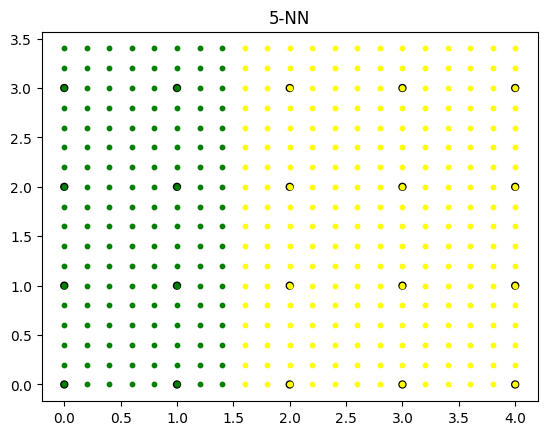

In [12]:
xTest=np.mgrid[0:4.2:0.2, 0:3.6:0.2].reshape(2,-1).T

thetitle = str(nKNN)+'-NN'
plt.title(thetitle)


plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

for point in xTest:
    plt.scatter(point[0], point[1], marker="o", c=colors[voteKnn(Xtrain, yTrain, nKNN, point)], s=10)

### more complex synthetic data

In this part, you will load another dataset. You first need to download this file: http://www.i3s.unice.fr/~lingrand/si3/datasetRandom.pickle and then run the next cell.

In [13]:
with open('datasetRandom.pickle', 'rb') as input:
    Xd, yd = pickle.load(input)

**Question 8:** Plot the dataset.

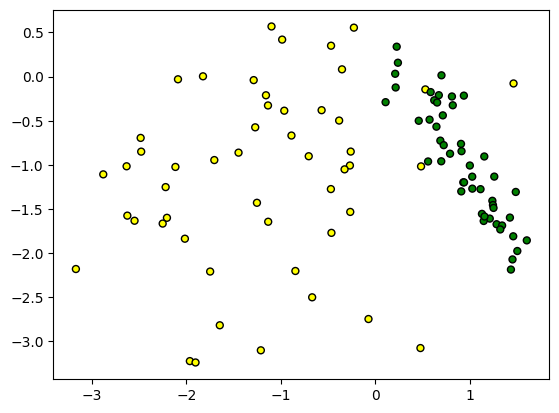

In [14]:
# your work here
plt.scatter(Xd[:,0], Xd[:,1], marker="o", c=colors[yd], s=25, edgecolor="k")

In [15]:
# use the first 60% for the training and the last 40% for the test
Xtrain = Xd[:60]
yTrain = yd[:60]
Xtest = Xd[60:]
yTest = yd[60:]

**Question 9:** Compute the label of the test set from the values of the training set. Plot the training set using round markers with black edge and plot the testing set without the black edge and using the predicted colors. If true class (yTest) and the predicted class do not match, add a red edge.

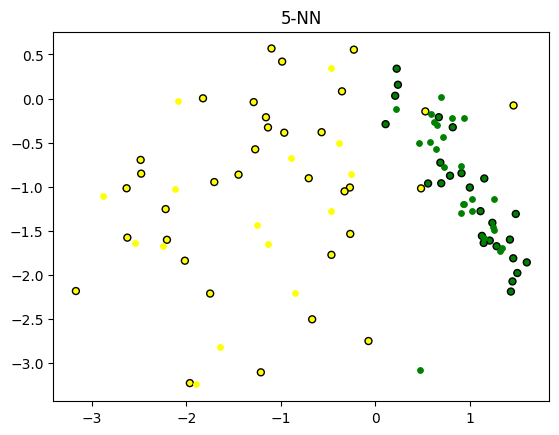

In [16]:
thetitle = str(nKNN)+'-NN'
plt.title(thetitle)


plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

for point in Xtest:
    plt.scatter(point[0], point[1], marker="o", c=colors[voteKnn(Xtrain, yTrain, nKNN, point)], s=15)

**Question 10:** Could you build a numerical metric for the classification evaluation?

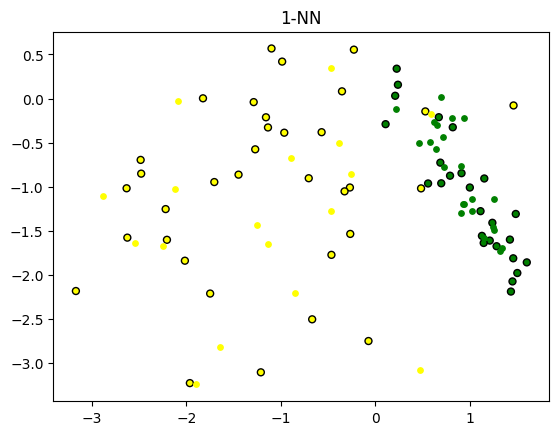